In [1]:
import DualwormFunctions as dw
import Observables as obs
%load_ext line_profiler
import RunBasis
import argparse
import StartStates as strst

In [2]:
def genArgs():
    parser = argparse.ArgumentParser()
    
    parser.add_argument('-f', type = str)
    parser.add_argument('--L', type = int, default = 32, help = 'Lattice side size')

    # COUPLINGS
    parser.add_argument('--J1', type = float, default = 1.0,
                        help = 'NN coupling') # nearest-neighbour coupling
    parser.add_argument('--J2', type = float, default = 0.0,
                        help = '2nd NN coupling') # 2nd NN coupling
    parser.add_argument('--J3', type = float, default = 0.0,
                        help = '3rd NN coupling') # 3rd NN coupling
    parser.add_argument('--J4', type = float, default = 0.0,
                        help = '4th NN coupling')

    #NUMBER OF STEPS AND ITERATIONS
    parser.add_argument('--nst', type = int, default = 0,
                        help = 'number of thermalisation steps') # number of thermalisation steps
    parser.add_argument('--nsm', type = int, default = 20,
                        help = 'number of measurements steps') # number of measurement steps
    parser.add_argument('--nips', type = int, default = 1,
                        help = 'number of worm constructions per MC step')
    parser.add_argument('--measperiod', type = int, default = 1,
                    help = 'number of nips worm building + swaps between measurements')
    parser.add_argument('--nb', type = int, default = 20,
                        help = 'number of bins')

    #PARALLELISATION
    parser.add_argument('--ncores', type = int, default = 8,
                        help = 'number of threads to use')

    #WORM PARAMETERS
    parser.add_argument('--nmaxiter', type = int, default = 1,
                        help = '''maximal number of segments in a loop update over the
                        size of the lattice (1 = 1times the number of dualbonds in the
                        lattice)''')
    parser.add_argument('--randominit', default = False, action ='store_true',
                        help = 'intialise the states randomly')
    parser.add_argument('--same', default = False, action = 'store_true',
                        help = '''initialise all temperatures with the same
                        state (debug purposes)''')
    parser.add_argument('--magninit', default = True, action = 'store_true',
                        help = '''initialise all the temperature with the maximally magnetised GS''')
    parser.add_argument('--measupdate', default = True, action = 'store_true',
                       help = '''activate to mimic the action of the measuring tip''')
    parser.add_argument('--p', type = float, default = 0.33, 
                       help = '''prob of the measuring tip flipping the spin''')
    
    #TEMPERATURE PARAMETERS
    parser.add_argument('--t_list', nargs = '+', type = float, default = [1e-16, 1.2e-16],
                        help = 'list of limiting temperature values')
    parser.add_argument('--nt_list', nargs = '+', type = int, default = [200],
                        help = 'list of number of temperatures in between the given limiting temperatures')
    parser.add_argument('--log_tlist', default = False, action='store_true',
                        help = 'state whether you want the temperature be spaced log-like or linear-like (activate if you want log)')
    parser.add_argument('--stat_temps_lims', nargs = '+', type = float,
                        help = '''limiting temperatures for the various ranges of
                        measurements''') 
                        #default will be set to none, and then we can decide what to do later on.

    #CORRELATIONS PARAMETER
    parser.add_argument('--energy', default = True, action = 'store_true',
                        help = 'activate if you want to save the energy')
    parser.add_argument('--magnetisation', default = True, action = 'store_true',
                        help = 'activate if you want to save the magnetisation')
    parser.add_argument('--magnstats', default = True, action = 'store_true',
                        help = 'activate if you want to compute the magnetisation statistics')
    parser.add_argument('--charges', default = True, action = 'store_true',
                        help = 'activate if you want to save the charges')
    parser.add_argument('--correlations', default = True, action = 'store_true',
                        help = 'activate if you want to save either central or all correlations')
    parser.add_argument('--all_correlations', default = False, action = 'store_true',
                        help = '''activate if you want to save the correlations for all non-equivalent
                        pairs of sites. Otherwise, will save central correlations.''')
    parser.add_argument('--firstcorrelations', default = True, action = 'store_true',
                        help = 'activate if you want to save first correlations, otherwise will save central')

    #SAVE
    parser.add_argument('--output', type = str, default = "test.out", help = 'saving filename (.pkl will be added)')
    args = parser.parse_args()
    return args

In [3]:
def callRunBasis():
    args = genArgs()
    return RunBasis.main(args)

In [4]:
%lprun -f dw.mcs_swaps meanstat = callRunBasis() 


Lattice side size:  32
J1  1.0
J2  0.0
J3  0.0
J3st  0.0
J4 0.0
Number of temperatures:  200
Fully random initialisation =  False
Identical initialisation =  False
Magnetisation initialisation =  True
{'random': False, 'same': False, 'magninit': True}
Same initialisation for all temperatures =  False
statesinit function called
False
not random
Initialisation type:  magninit
Check: length of s_ijl 9216
Check: lengthon NN pairslist: 18432
Check: length of 2ndNN pairs list:  18432
Check: length of 3rdNN pairs list:  18432
Check: length of 4thNN pairs list:  9216
List of measurements to be performed: ['Energy', 'Magnetisation', 'Charges', 'Si', 'FirstCorrelations']
List of temperature indices to measure: range(0, 200)
Number of thermalisation steps =  0
itermcs =  0
magnstats False
statsfunctions []
Time for mcsevolve = 0
Time for tempering = 0
Time for mapping to spins + computing statistics= 0
Time for all thermalisation steps =  0.00045418739318847656
Number of measurement steps =  20
[

In [5]:
meanstattot = {}
for i in range(200):
    for key in meanstat[i].keys():
        if key in meanstattot:
            meanstattot[key].append(meanstat[i][key])
        else:
            meanstattot[key] = [meanstat[i][key]]

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(66.3194,0.5,'bin')

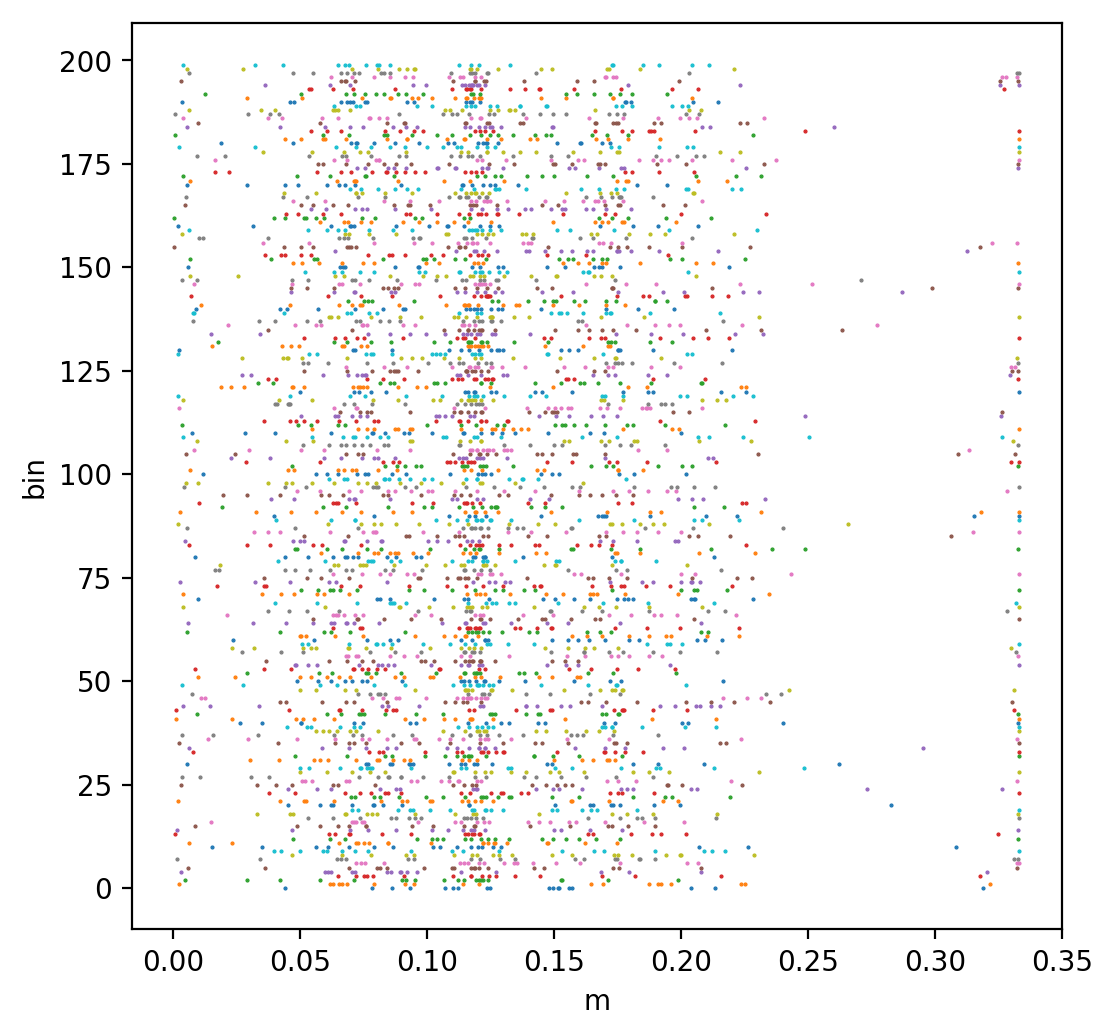

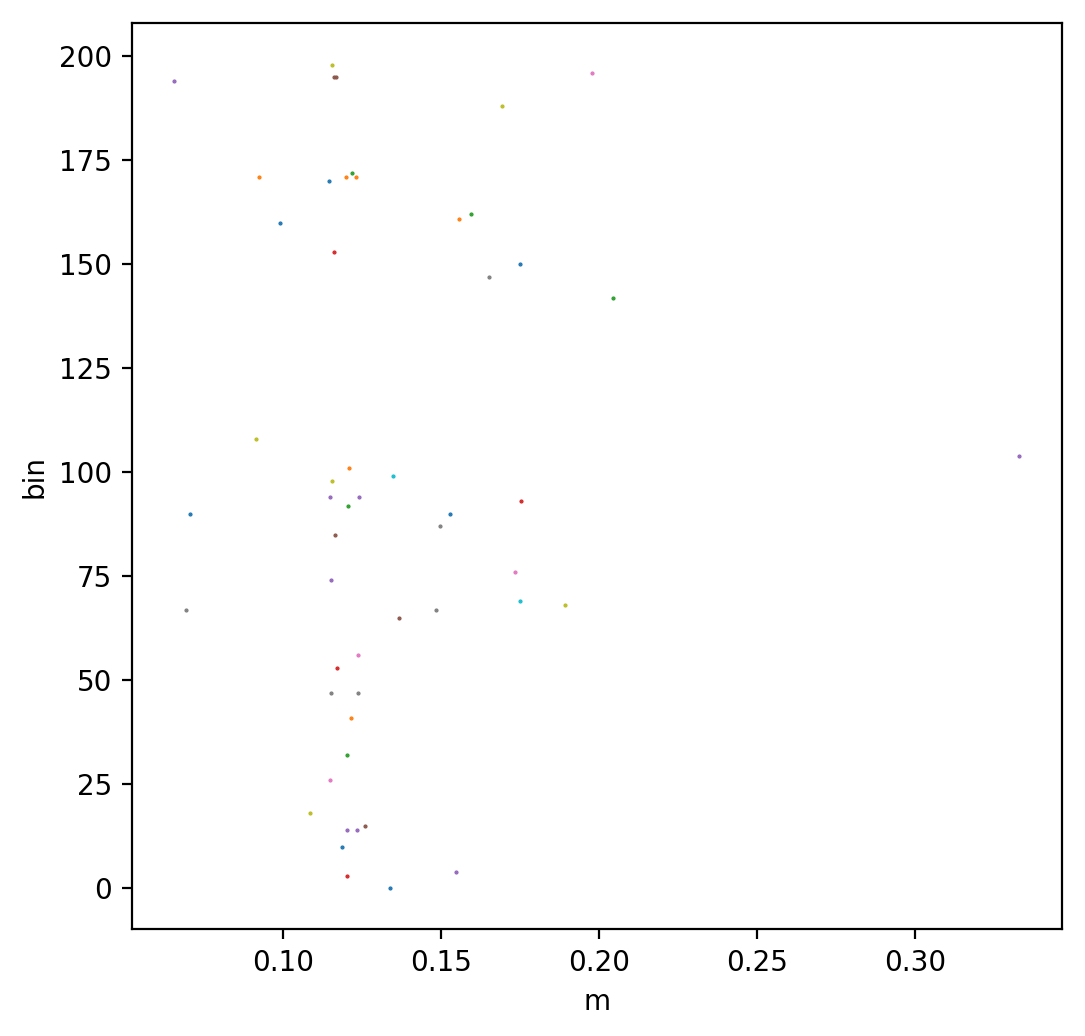

In [7]:
fig, ax = plt.subplots(figsize = (6,6), dpi=200)
toplot = [[] for i in range(200)]
for i in range(200):
    toplot[i] = [key for key in meanstat[i].keys() if len(meanstat[i][key])==1]
    plt.plot(toplot[i], [i for j in range(len(toplot[i]))],'.', Markersize = 1)
plt.xlabel('m')
plt.ylabel('bin')
plt.savefig('From maximally magnetized state_OnceThrough.png')
fig, ax = plt.subplots(figsize = (6,6), dpi=200)
for i in range(200):
    toplot[i] = [key for key in meanstat[i].keys() if len(meanstat[i][key])!=1]
    plt.plot(toplot[i], [i for j in range(len(toplot[i]))],'.', Markersize = 1)
plt.savefig('From maximally magnetized state_MoreThanOnceThrough.png')
plt.xlabel('m')
plt.ylabel('bin')

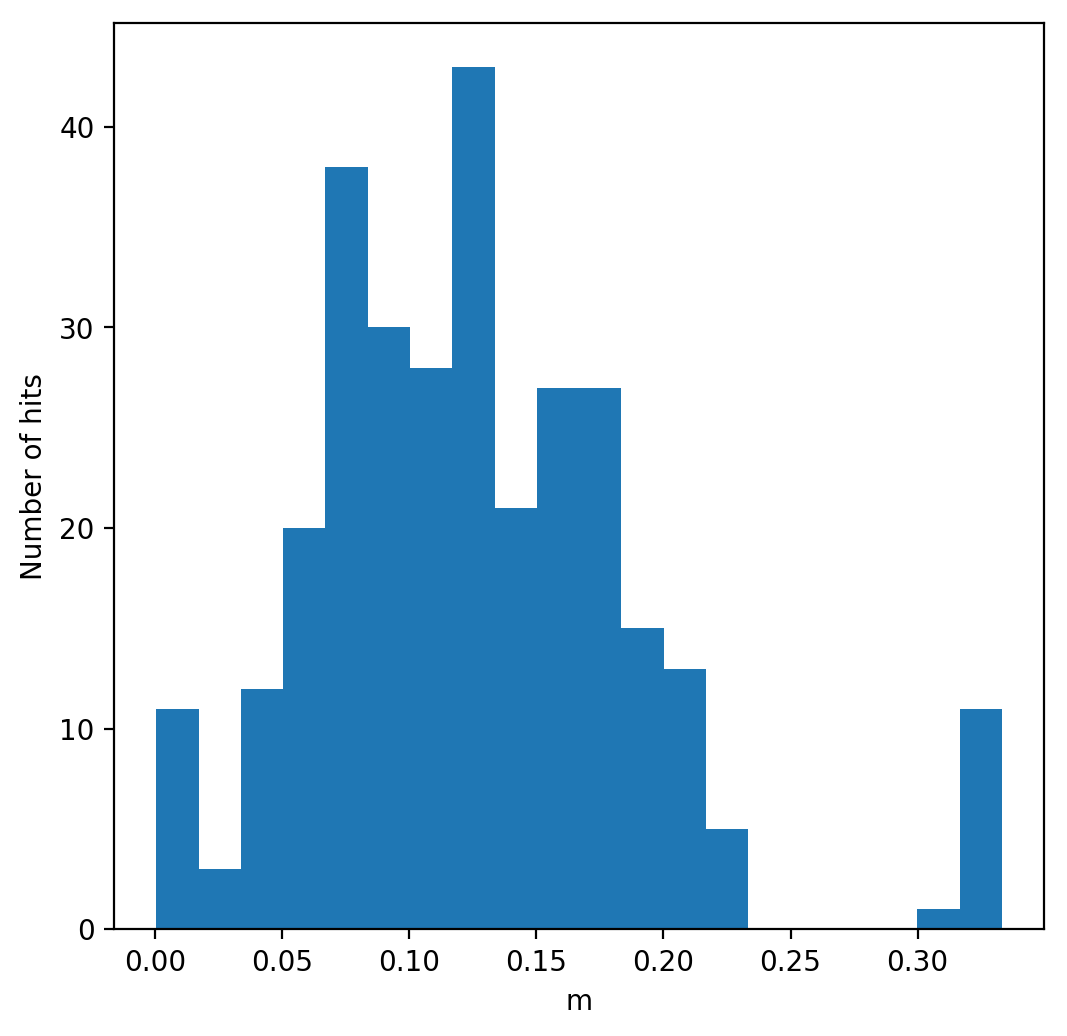

In [8]:
fig, ax = plt.subplots(figsize = (6,6), dpi=200)
plt.hist(sorted(meanstattot.keys()), bins = 20)
plt.xlabel('m')
plt.ylabel('Number of hits')
plt.savefig('FromMaximallyMagnetisedState_Histogram_n=200.png')

In [9]:
#Computing the statistics:
